In [68]:
# importing the require libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [69]:
#reading the data
insurance = pd.read_csv("insurance.csv")

In [70]:
insurance.shape

(1338, 7)

In [71]:
a = insurance.shape[0]

In [72]:
#checking for the type of data in each column
insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [73]:
#looking at first five rows
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [74]:
#looking at the statistics of different column values
insurance.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [75]:
insurance.isnull().sum() # checking for null values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [76]:
# correlation matrix
insurance.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000



**The target variable of "*charges*" has a high positive relation with age and bmi**.


In [77]:
#creating a categorical column for age range
agerange= [17,25,30,35,40,45,50,55,60,65]
agelabels = ['18-25','25-30','30-35','35-40','40-45','45-50','50-55','55-60','60-65']
insurance["age_group"]= pd.cut(insurance['age'], bins=agerange, labels=agelabels,right=True)

In [78]:
#creating a categorical column for bmi range
bmirange = [15,20,25,30,35,40,45,50,55]
bmilabels =['15-20','20-25','25-30','30-35','35-40','40-45','40-50','50-55']
insurance["bmi_group"] = pd.cut(insurance['bmi'],bins=bmirange,labels=bmilabels,right=True)

#### **The age and bmi column is categorized to different groups and labelled and assigned back in dataframe** #####

In [79]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges,age_group,bmi_group
0,19,female,27.900,0,yes,southwest,16884.92400,18-25,25-30
1,18,male,33.770,1,no,southeast,1725.55230,18-25,30-35
2,28,male,33.000,3,no,southeast,4449.46200,25-30,30-35
3,33,male,22.705,0,no,northwest,21984.47061,30-35,20-25
4,32,male,28.880,0,no,northwest,3866.85520,30-35,25-30


In [80]:

insurance.pivot_table('charges', index=['smoker', 'bmi_group'], columns='age_group', aggfunc=np.mean)


age_group                18-25         25-30         30-35         35-40  \
smoker bmi_group                                                           
no     15-20       4214.310539   4062.763970   5545.186800   6483.269775   
       20-25       4125.208680   4975.209758   8548.120096   7294.190125   
       25-30       3736.449927   5846.373004   5063.772028   6806.267892   
       30-35       4442.364640   6084.160322   5394.331312   7039.268493   
       35-40       3618.191813   5068.305488   7269.839999   8761.792966   
       40-45       3506.424583   3907.842938   5980.666946   9102.824299   
       40-50               NaN   3310.246350   4686.388700   6395.947200   
       50-55       1800.758950           NaN           NaN           NaN   
yes    15-20      12829.455100  14731.111750  24755.245175  17341.160333   
       20-25      16514.397039  17106.673311  18254.277283  19904.152633   
       25-30      18374.602288  18829.385967  19887.159933  20947.832521   
       30-35      34652.941597  35320.081180  38650.581950  38952.864425   
       35-40      37025.934933  40982.215487  46094.900474  40210.606700   
       40-45      39386.469450  39611.757700           NaN  43753.337050   
       40-50      42112.235600           NaN           NaN  46113.511000   
       50-55      44501.398200           NaN           NaN           NaN   

age_group                40-45         45-50         50-55         55-60  \
smoker bmi_group                                                           
no     15-20               NaN   8444.038838   9817.645075  12369.579150   
       20-25       8196.295083  10539.060761  11824.746511  12800.202020   
       25-30       9249.349554  11539.418707  13178.985215  13211.501559   
       30-35       7658.028495  10163.619209  12730.765245  13294.530223   
       35-40       8794.241778  11333.654017  13482.653305  13408.719445   
       40-45       6679.969075   9486.710863  10819.369150  14393.899619   
       40-50               NaN   8909.068000  11293.288700  11381.325400   
       50-55               NaN           NaN           NaN           NaN   
yes    15-20               NaN           NaN           NaN  22412.648500   
       20-25      21883.224036  22335.957267  23465.284364  25678.778450   
       25-30      27297.472314  23871.733532  24814.446133  27761.653975   
       30-35      43206.620806  41279.575529  46080.162728  45840.716765   
       35-40      43264.614585  42634.278060  45435.191075  47855.548933   
       40-45      45048.680700  45926.573425  47760.642117  48773.108033   
       40-50      45863.205000           NaN  63770.428010           NaN   
       50-55               NaN           NaN           NaN           NaN   

age_group                60-65  
smoker bmi_group                
no     15-20               NaN  
       20-25      15554.155808  
       25-30      15179.392040  
       30-35      15639.395652  
       35-40      15459.072756  
       40-45      13685.925250  
       40-50               NaN  
       50-55               NaN  
yes    15-20               NaN  
       20-25      26982.214250  
       25-30      29083.361512  
       30-35      46973.670383  
       35-40      47996.366008  
       40-45               NaN  
       40-50               NaN  
       50-55               NaN

## DATA VISUALISATION ##

<AxesSubplot:xlabel='children', ylabel='count'>

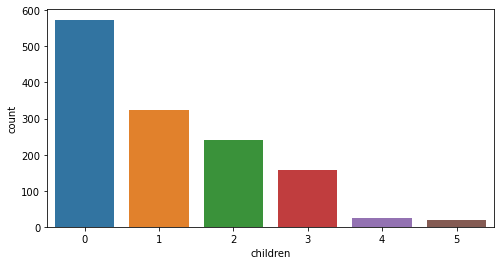

In [81]:
#NUMBER OF CHILDREN
plt.figure(figsize=(8,4))
sns.countplot(x="children",data = insurance)


<Figure size 144x216 with 0 Axes>

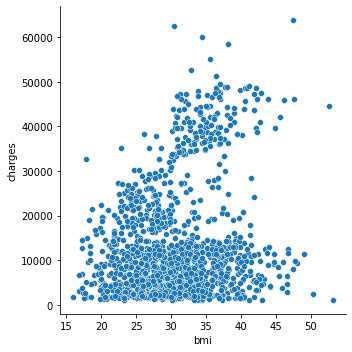

In [82]:

plt.figure(figsize=(2,3))
sns.relplot(x = 'bmi',y = 'charges',data= insurance,kind= 'scatter')

<Figure size 1440x2160 with 0 Axes>

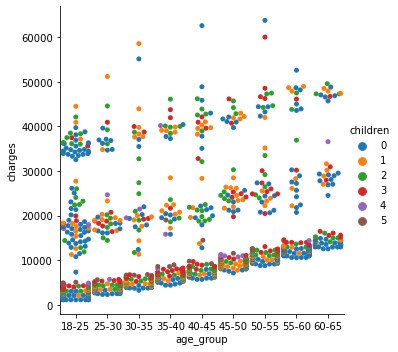

In [83]:
plt.figure(figsize=(20,30))
sns.catplot(x = 'age_group',y = 'charges',data= insurance,kind= 'swarm',hue="children")

**There doesnt seem to be a definite relationship of charges with age and children**

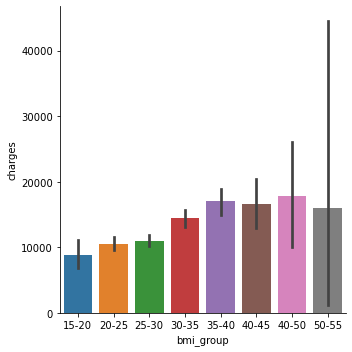

In [84]:
sns.catplot(x = 'bmi_group',y = 'charges',data= insurance,kind= 'bar')

**A increase in charges is notices with larger bmi but lower for older ages (50-55)**

<Figure size 288x144 with 0 Axes>

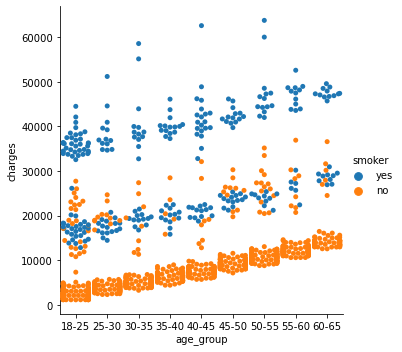

In [85]:
plt.figure(figsize=(4,2))
sns.catplot(x = 'age_group',y = 'charges',data= insurance,kind= 'swarm',hue='smoker')

**smoking have high impact on charges across all age groups as seen in both swarm and bar plot**

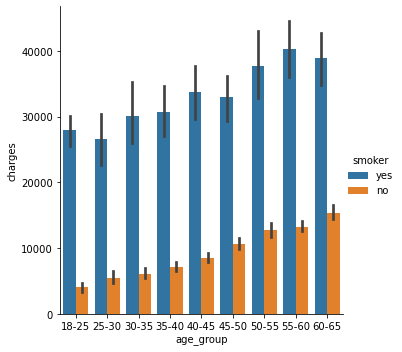

In [86]:
sns.catplot(data=insurance, kind="bar", x="age_group", y="charges", hue="smoker")

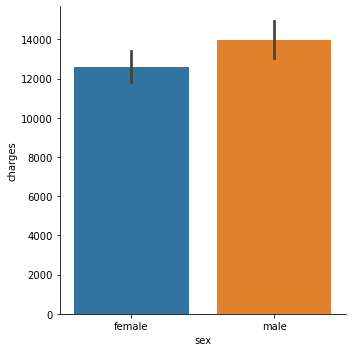

In [87]:
sns.catplot(data=insurance,y="charges",x="sex",kind = "bar")

In [88]:
insurance['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

**There doesnt seems to be a large change in charge with age**

In [89]:
insurance.drop(['region','sex','age','bmi','children'],axis =1, inplace=True)

#### The highhly correlated features of age, bmi and smoker are taken for finding linear regression ####

In [90]:
#converting categorical to numerical
insur = pd.get_dummies(insurance)

In [91]:
insur.corr()

,charges,smoker_no,smoker_yes,age_group_18-25,age_group_25-30,age_group_30-35,age_group_35-40,age_group_40-45,age_group_45-50,age_group_50-55,age_group_55-60,age_group_60-65,bmi_group_15-20,bmi_group_20-25,bmi_group_25-30,bmi_group_30-35,bmi_group_35-40,bmi_group_40-45,bmi_group_40-50,bmi_group_50-55
charges,1.000000,-0.787251,0.787251,-0.188178,-0.089203,-0.063441,-0.024194,0.035384,0.050008,0.104982,0.102760,0.173898,-0.065092,-0.095090,-0.119542,0.061297,0.139349,0.064516,0.042588,0.010823
smoker_no,-0.787251,1.000000,-1.000000,-0.010302,-0.010595,0.003888,-0.012590,-0.030208,0.008897,0.028255,0.048352,-0.024752,-0.006489,-0.019575,0.016541,0.027166,-0.019430,-0.012066,-0.008577,-0.015101
smoker_yes,0.787251,-1.000000,1.000000,0.010302,0.010595,-0.003888,0.012590,0.030208,-0.008897,-0.028255,-0.048352,0.024752,0.006489,0.019575,-0.016541,-0.027166,0.019430,0.012066,0.008577,0.015101
age_group_18-25,-0.188178,-0.010302,0.010302,1.000000,-0.184659,-0.178632,-0.176340,-0.183912,-0.189104,-0.186147,-0.174802,-0.147099,0.016761,0.053684,-0.020731,0.015816,-0.040240,-0.017764,-0.045884,0.087056
age_group_25-30,-0.089203,-0.010595,0.010595,-0.184659,1.000000,-0.111247,-0.109819,-0.114535,-0.117768,-0.115927,-0.108861,-0.091609,0.039514,0.045982,0.001022,-0.011478,-0.034207,-0.025464,0.005411,-0.016076
age_group_30-35,-0.063441,0.003888,-0.003888,-0.178632,-0.111247,1.000000,-0.106235,-0.110797,-0.113925,-0.112143,-0.105308,-0.088619,0.014882,-0.021080,0.019473,-0.026647,0.021179,0.012402,-0.014684,-0.015551
age_group_35-40,-0.024194,-0.012590,0.012590,-0.176340,-0.109819,-0.106235,1.000000,-0.109375,-0.112463,-0.110705,-0.103957,-0.087482,0.075579,-0.018038,0.058318,-0.022029,-0.077426,0.014342,0.031564,-0.015351
age_group_40-45,0.035384,-0.030208,0.030208,-0.183912,-0.114535,-0.110797,-0.109375,1.000000,-0.117292,-0.115458,-0.108421,-0.091238,-0.060050,0.019859,0.002595,0.000921,0.032706,-0.035961,-0.016303,-0.016011
age_group_45-50,0.050008,0.008897,-0.008897,-0.189104,-0.117768,-0.113925,-0.112463,-0.117292,1.000000,-0.118717,-0.111482,-0.093814,-0.005773,-0.054596,0.050342,-0.004596,-0.027180,0.025377,0.046734,-0.016463
age_group_50-55,0.104982,0.028255,-0.028255,-0.186147,-0.115927,-0.112143,-0.110705,-0.115458,-0.118717,1.000000,-0.109739,-0.092347,-0.032444,0.009779,-0.077548,0.039240,0.042158,-0.004673,0.048426,-0.016205


In [92]:
#separating into target and features
features= insur.drop(['charges'],axis=1)
features.head()

,smoker_no,smoker_yes,age_group_18-25,age_group_25-30,age_group_30-35,age_group_35-40,age_group_40-45,age_group_45-50,age_group_50-55,age_group_55-60,age_group_60-65,bmi_group_15-20,bmi_group_20-25,bmi_group_25-30,bmi_group_30-35,bmi_group_35-40,bmi_group_40-45,bmi_group_40-50,bmi_group_50-55
0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [93]:
target = insur['charges']
target.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [94]:
from sklearn.model_selection import train_test_split as tts #splitting data into train set and test set

In [95]:
X_train,X_test,y_train,y_test = tts(features,target,random_state=88)

In [96]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae

In [97]:
linreg = LR(normalize =True)

In [98]:
linreg.fit(X_train,y_train)

LinearRegression(normalize=True)

In [99]:
train_predict = linreg.predict(X_train)
k = mae(train_predict,y_train)
k

4360.389793857428

In [100]:
test_predict = linreg.predict(X_test)
k = mae(test_predict,y_test)
k

4268.245517492537

In [101]:
from sklearn.linear_model import Ridge

In [102]:
ridge_reg = Ridge(alpha = 1)

In [103]:
ridge_reg.fit(X_train,y_train)

Ridge(alpha=1)

In [104]:
train_predict = ridge_reg.predict(X_train)
k = mae(train_predict,y_train)
k

4342.577145265919

In [105]:
test_predict = ridge_reg.predict(X_test)
k = mae(test_predict,y_test)
k

4250.786458173615

In [106]:
from sklearn.linear_model import Lasso

In [107]:
lasso_reg = Lasso(alpha=1)

In [108]:
lasso_reg.fit(X_train,y_train)

Lasso(alpha=1)

In [109]:
train_predict = lasso_reg.predict(X_train)
k = mae(train_predict,y_train)
k

4347.128582917154

In [110]:
test_predict = lasso_reg.predict(X_test)
k = mae(test_predict,y_test)
k

4251.767055053145